In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [52]:
def getDataSetX(item, start, to, size) :
    arr = []
    for i in range(start, to - (size-1)) :
        arr.append(item[i:i+size , 0])
    nparr = np.array(arr)
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))
    return (nparr)

In [53]:
def getDataSetY(item, start, to, size) :
    arr = []
    for i in range(start + size, to + 1) :
        arr.append(item[i, 0])
    nparr = np.array(arr)
    return (nparr)

In [54]:
df = pd.read_csv("C:/Users/user8/Desktop/Temp_data.csv")
df = df.iloc[ :100000]
print(df.shape)

(100000, 7)


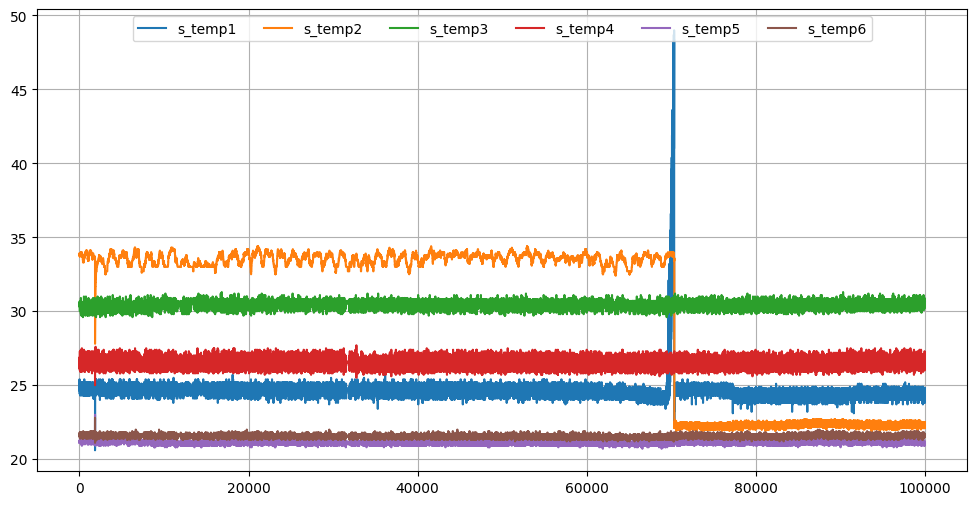

In [55]:
plt.figure(figsize=(12,6))

plt.plot(df['S_TEMP1'], label='s_temp1')
plt.plot(df['S_TEMP2'], label='s_temp2')
plt.plot(df['S_TEMP3'], label='s_temp3')
plt.plot(df['S_TEMP4'], label='s_temp4')
plt.plot(df['S_TEMP5'], label='s_temp5')
plt.plot(df['S_TEMP6'], label='s_temp6')
plt.legend(loc='upper center', ncol=6)
plt.grid()

plt.show()

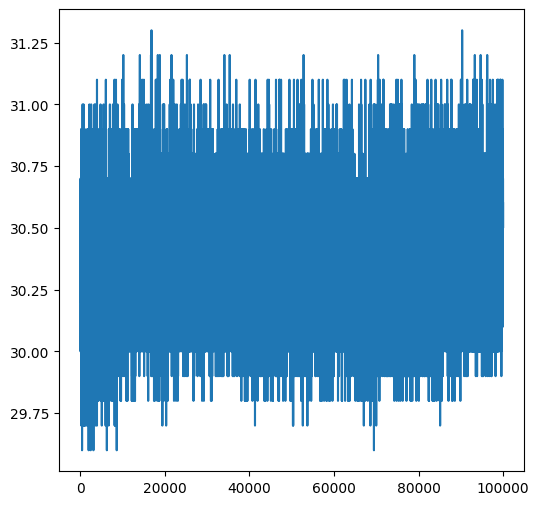

In [56]:
plt.figure(figsize=(6,6))
plt.plot(df['S_TEMP3'])
plt.show()

In [57]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['S_TIME', 'S_TEMP3'])

for i in range(0, len(data)) :
    
    new_data['S_TIME'][i] = data['S_TIME'][i]
    new_data['S_TEMP3'][i] = data['S_TEMP3'][i]
    
new_data.index = new_data.S_TIME
new_data.drop('S_TIME', axis=1, inplace=True)

final_data = new_data.values

train_idx = int(final_data.shape[0] * 0.8)

print(train_idx)
print(final_data.shape[0] - train_idx)

80000
20000


In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data) 

In [59]:
x_train = getDataSetX(scaled_data, 0, train_idx-1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx-1, 10)
x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0]-1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0]-1, 10)

In [60]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32,
                             validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0065 - val_loss: 0.0046
Epoch 2/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 5/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 8/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 9/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 10/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.003

In [62]:
lstm_model.save('C:/Users/user8/Desktop/lstm_temp3.h5')

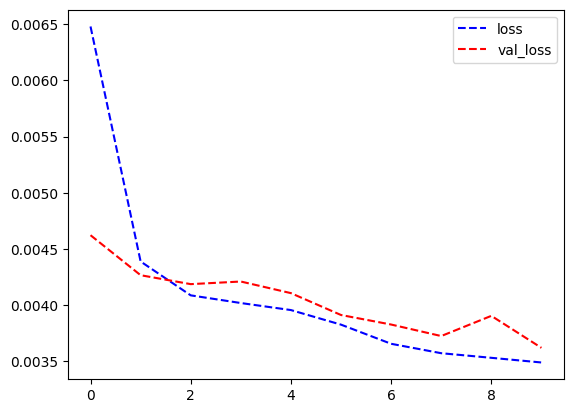

In [63]:
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [64]:
pred_s_temp3 = lstm_model.predict(x_test)
pred_s_temp3 = scaler.inverse_transform(pred_s_temp3)

In [65]:
test_data = final_data[train_idx: , : ]
print(test_data[10:, 0])
print(pred_s_temp3[ : , 0])

# MAPE(Mean Absolute Percentage Error)
print(np.mean(np.abs((test_data[10:, 0] - pred_s_temp3[ : , 0]) / test_data[10:, 0]))*100)

[30.5 30.4 30.4 ... 30.5 30.6 30.6]
[30.418325 30.448664 30.408037 ... 30.498816 30.501808 30.548458]
0.2286041068075331


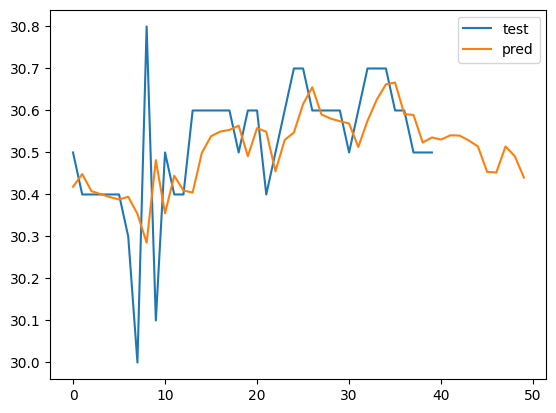

In [66]:
plt.plot(test_data[10:50, 0], label='test')
plt.plot(pred_s_temp3[:50], label='pred')
plt.legend()
plt.show()